### Problem 6: Market Segmentation

In [1]:
import pandas as pd
from sklearn.cluster import SpectralClustering, KMeans
import matplotlib.pyplot as plt

In [2]:
social_m = pd.read_csv("data/social_marketing.csv")

social_m.rename(columns={"Unnamed: 0":"id"}, inplace=True)
social_m[:10]


,id,chatter,current_events,travel,photo_sharing,uncategorized,tv_film,sports_fandom,politics,food,...,religion,beauty,parenting,dating,school,personal_fitness,fashion,small_business,spam,adult
0,hmjoe4g3k,2,0,2,2,2,1,1,0,4,...,1,0,1,1,0,11,0,0,0,0
1,clk1m5w8s,3,3,2,1,1,1,4,1,2,...,0,0,0,1,4,0,0,0,0,0
2,jcsovtak3,6,3,4,3,1,5,0,2,1,...,0,1,0,1,0,0,1,0,0,0
3,3oeb4hiln,1,5,2,2,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,fd75x1vgk,5,2,0,6,1,0,0,2,0,...,0,0,0,0,0,0,0,1,0,0
5,h6nvj91yp,6,4,2,7,0,1,1,0,2,...,0,0,0,0,0,0,0,0,0,0
6,ma7kfewxq,1,2,7,1,0,1,1,11,1,...,1,0,0,0,0,0,0,0,0,0
7,u48d61ztj,5,3,3,6,1,1,1,0,0,...,0,5,1,0,0,0,4,0,0,0
8,y2g68vhkf,6,2,0,1,0,0,0,0,2,...,0,5,0,0,1,12,3,1,0,0
9,n467yj1st,5,2,4,4,0,5,9,1,5,...,13,1,3,0,3,2,1,0,0,0


<Axes: >

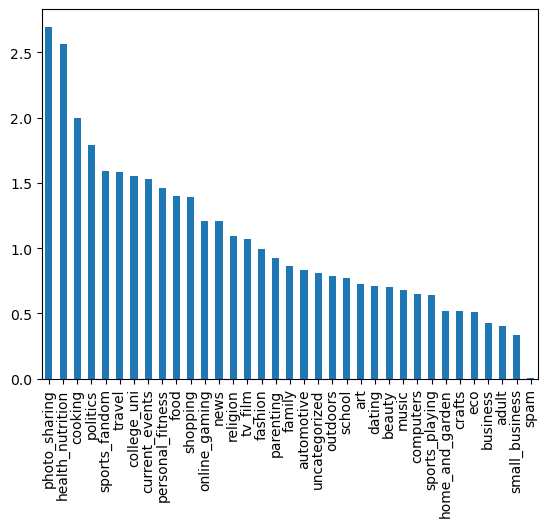

In [3]:
social_m.describe().loc["mean"][1:].sort_values(ascending=False).plot(kind="bar")

In [4]:
social_m = social_m.set_index("id")
social_m["total_points"] = social_m.T.sum()

In [5]:
percentage_sm = social_m[["total_points"]].copy()
for col in social_m.columns:
    if col != "total_points":
        percentage_sm[f"{col}_perc"] = (social_m[col] / social_m["total_points"])*100

percentage_sm

,total_points,chatter_perc,current_events_perc,travel_perc,photo_sharing_perc,uncategorized_perc,tv_film_perc,sports_fandom_perc,politics_perc,food_perc,...,religion_perc,beauty_perc,parenting_perc,dating_perc,school_perc,personal_fitness_perc,fashion_perc,small_business_perc,spam_perc,adult_perc
id,,,,,,,,,,,,,,,,,,,,,
hmjoe4g3k,61,3.278689,0.000000,3.278689,3.278689,3.278689,1.639344,1.639344,0.000000,6.557377,...,1.639344,0.000000,1.639344,1.639344,0.000000,18.032787,0.000000,0.000000,0.000000,0.000000
clk1m5w8s,30,10.000000,10.000000,6.666667,3.333333,3.333333,3.333333,13.333333,3.333333,6.666667,...,0.000000,0.000000,0.000000,3.333333,13.333333,0.000000,0.000000,0.000000,0.000000,0.000000
jcsovtak3,47,12.765957,6.382979,8.510638,6.382979,2.127660,10.638298,0.000000,4.255319,2.127660,...,0.000000,2.127660,0.000000,2.127660,0.000000,0.000000,2.127660,0.000000,0.000000,0.000000
3oeb4hiln,21,4.761905,23.809524,9.523810,9.523810,0.000000,4.761905,0.000000,4.761905,0.000000,...,0.000000,4.761905,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
fd75x1vgk,30,16.666667,6.666667,0.000000,20.000000,3.333333,0.000000,0.000000,6.666667,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.333333,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
y3ijoqfgd,18,27.777778,22.222222,11.111111,5.555556,0.000000,5.555556,0.000000,5.555556,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,11.111111,0.000000,0.000000,0.000000,0.000000
n6gud4ext,58,15.517241,5.172414,3.448276,6.896552,0.000000,1.724138,0.000000,6.896552,1.724138,...,0.000000,1.724138,0.000000,1.724138,0.000000,8.620690,0.000000,1.724138,0.000000,0.000000
f71rt6cyg,49,6.122449,4.081633,2.040816,2.040816,0.000000,8.163265,2.040816,4.081633,2.040816,...,2.040816,0.000000,2.040816,2.040816,0.000000,12.244898,2.040816,0.000000,0.000000,0.000000


<Axes: >

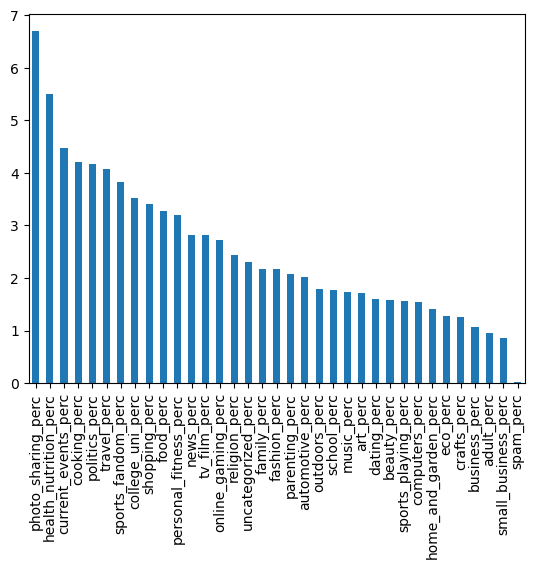

In [6]:
percentage_sm.describe().loc["mean"].sort_values(ascending=False)[2:].plot(kind="bar")

In [23]:
model = KMeans(n_clusters=6, random_state=42)
model.fit(percentage_sm)

/Users/rafainrsm/anaconda3/envs/STA380/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6, random_state=42)

In [21]:
clusters = pd.DataFrame(columns=percentage_sm.columns)
clusters
i = 0
for cluster_center in model.cluster_centers_:
    row = {}
    for j in range(len(cluster_center)):
        row[percentage_sm.columns[j]] = cluster_center[j]
    
    row = pd.DataFrame(row, index=[0])
    clusters = pd.concat([clusters,row], ignore_index=True)

clusters = clusters.T
clusters


,0,1,2,3,4,5
total_points,63.798172,23.800882,42.777273,96.185567,38.500000,21.587739
chatter_perc,9.682487,25.714848,10.106258,7.170338,7.191575,8.989381
current_events_perc,2.857847,6.055332,3.674237,2.289102,3.554049,6.502143
travel_perc,3.379456,3.875899,4.348885,3.720277,2.667681,5.238568
photo_sharing_perc,6.969840,11.593053,6.044302,5.745579,3.724931,5.147888
uncategorized_perc,1.645261,2.744261,1.945170,1.351048,2.025722,3.275947
tv_film_perc,2.310127,2.187368,2.998970,2.065503,1.639268,4.246280
sports_fandom_perc,3.705327,2.492362,4.822354,3.863107,2.133912,4.676941
politics_perc,4.190360,2.816561,5.649983,4.747261,1.986113,4.434403
food_perc,3.367828,1.834322,3.509637,3.704600,3.853333,3.627999


In [ ]:
clusters[0].sort_values(ascending=False)

In [22]:
clusters[1].sort_values(ascending=False)

chatter_perc             25.714848
total_points             23.800882
photo_sharing_perc       11.593053
shopping_perc             6.549969
current_events_perc       6.055332
travel_perc               3.875899
politics_perc             2.816561
uncategorized_perc        2.744261
sports_fandom_perc        2.492362
tv_film_perc              2.187368
family_perc               2.146291
college_uni_perc          2.081222
health_nutrition_perc     1.986385
cooking_perc              1.875120
food_perc                 1.834322
music_perc                1.732941
automotive_perc           1.697275
online_gaming_perc        1.626427
home_and_garden_perc      1.624403
personal_fitness_perc     1.590982
eco_perc                  1.465108
sports_playing_perc       1.400231
computers_perc            1.364191
fashion_perc              1.361199
school_perc               1.359886
crafts_perc               1.271081
business_perc             1.267939
dating_perc               1.162331
news_perc           

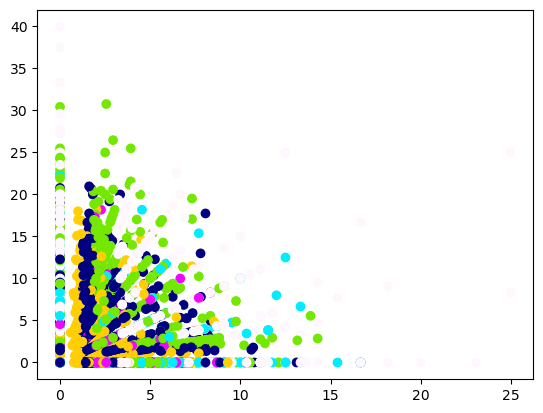

In [24]:
plt.scatter(percentage_sm["sports_playing_perc"],percentage_sm["sports_fandom_perc"], c=model.labels_, cmap='gist_ncar')

In [14]:
percentage_sm.describe()

,total_points,chatter_perc,current_events_perc,travel_perc,photo_sharing_perc,uncategorized_perc,tv_film_perc,sports_fandom_perc,politics_perc,food_perc,...,religion_perc,beauty_perc,parenting_perc,dating_perc,school_perc,personal_fitness_perc,fashion_perc,small_business_perc,spam_perc,adult_perc
count,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,...,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000,7882.000000
mean,41.334940,11.975833,4.477727,4.071748,6.696913,2.301427,2.810814,3.834709,4.169741,3.270796,...,2.429195,1.574427,2.075475,1.604636,1.768512,3.198191,2.163141,0.852728,0.015048,0.962169
std,22.117873,8.985459,4.511043,4.925694,6.138181,3.086383,4.196692,4.670619,5.960521,3.858794,...,3.882390,2.766900,3.177526,3.720246,2.722720,4.825800,3.595640,1.744408,0.222166,4.238640
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,5.128205,1.408451,0.000000,2.040816,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,10.000000,3.488372,2.702703,5.405405,1.538462,1.298701,2.439024,2.000000,2.325581,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,54.000000,17.073171,6.250000,5.769231,10.000000,3.571429,4.081633,5.882353,5.882353,5.084746,...,3.571429,2.439024,3.225806,1.923077,2.941176,4.584639,3.225806,1.298701,0.000000,0.000000
max,171.000000,66.666667,40.000000,50.000000,46.153846,37.500000,40.740741,40.000000,40.909091,33.333333,...,31.578947,28.571429,25.641026,34.782609,33.333333,37.500000,33.333333,21.428571,7.142857,50.000000


/Users/rafainrsm/anaconda3/envs/STA380/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/rafainrsm/anaconda3/envs/STA380/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/rafainrsm/anaconda3/envs/STA380/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/rafainrsm/anaconda3/envs/STA380/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicit

<Axes: xlabel='Num of clusters', ylabel='Sum of distances of points to closest cluster'>

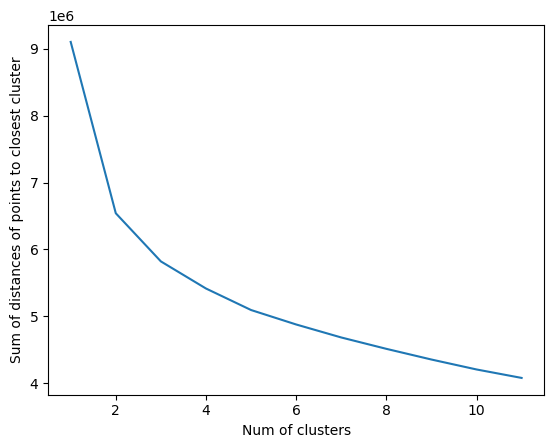

In [15]:
sum_of_distances = {}
for num_clusters in range(1,12):
    kmeans = KMeans(n_clusters=num_clusters, random_state=1)
    kmeans.fit(percentage_sm)
    sum_of_distances[num_clusters] = kmeans.inertia_
pd.Series(sum_of_distances).sort_index().plot(xlabel="Num of clusters", ylabel="Sum of distances of points to closest cluster")